У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme()

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/yulu_rental.csv')
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

<Figure size 1200x800 with 0 Axes>

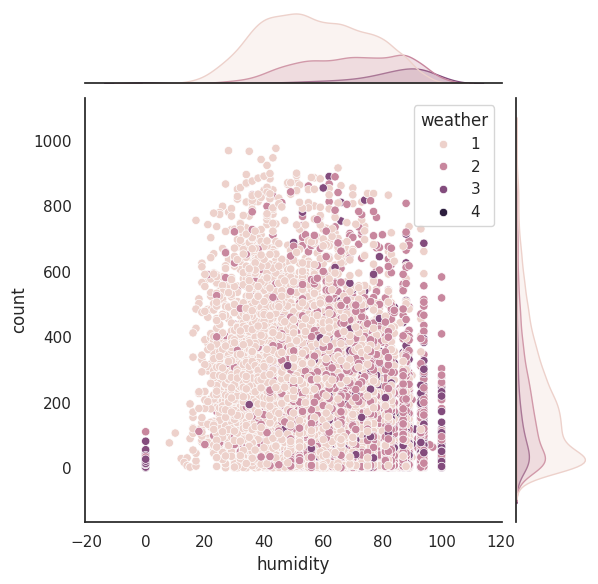

In [2]:
sns.set(style="white")
plt.figure(figsize=(12,8))
sns.jointplot(data=df, x='humidity', y='count', hue='weather')

##Відповідь

1. При дуже низьких і високих рівнях вологості кількість оренд зменшується. Найчастіше оренда відбуваються за помірних рівнів вологості.

2. Категорії погоди 1 та 2, тобто Весна і Літо, мають більшу кількість оренд, що свідчить про вплив погоди на рішення людей щодо оренди велосипедів.



Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

<Figure size 1200x800 with 0 Axes>

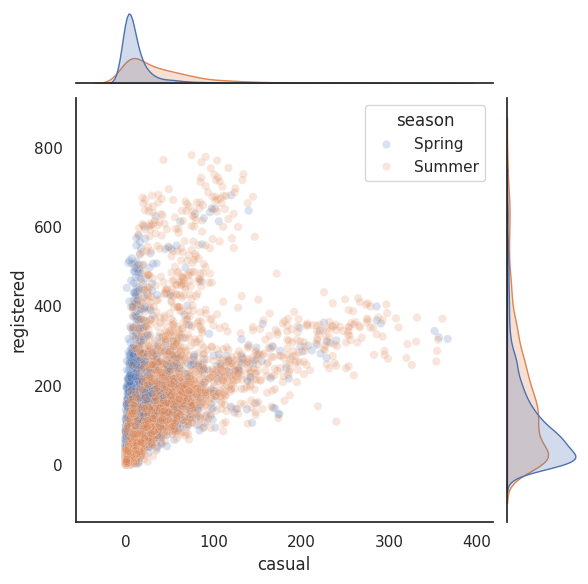

In [22]:
sns.set(style="white")
warm_seasons = df[df['season'].isin([1, 2])].copy()
plt.figure(figsize=(12,8))

season_mapping = {1: 'Spring', 2: 'Summer'}
warm_seasons['season'] = warm_seasons['season'].map(season_mapping)
sns.jointplot(data=warm_seasons, x='casual', y='registered', hue='season', alpha=0.2)

##Відповідь

1. Розподіл за сезонами. Кольорове розрізнення (синій для весни та помаранчовий для літа) дозволяє побачити, що розподіл між сезонами схожий, хоча можливо є невелике збільшення кількості неформальних користувачів у літній період.

2. Кореляція між незареєстрованими та зареєстрованими користувачами. Є позитивний зв'язок між їх кількістю, оскільки збільшення однієї групи схоже відбувається одночасно з збільшенням іншої.

3. Особливості поведінки користувачів. На графіку можна побачити, що велика кількість зареєстрованих користувачів не завжди відповідає високій кількості незареєстрованих користувачів, що може свідчити про різні мотивації для використання прокату серед цих двох груп. Наприклад, нижче буде графік, де видно, що зареєстровані користувачі орендують більше велосипедів у робочі дні, а не святкові. Це може бути пов’язано з регулярними поїздками користувачів на роботу в робочі дні.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


<Axes: xlabel='weather', ylabel='humidity'>

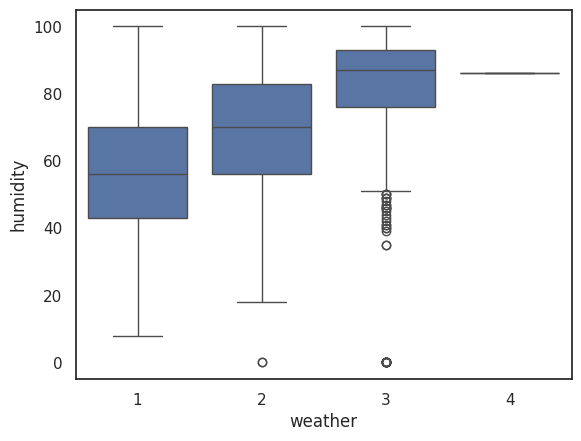

In [4]:
sns.boxplot(x='weather', y='humidity', data=df)

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

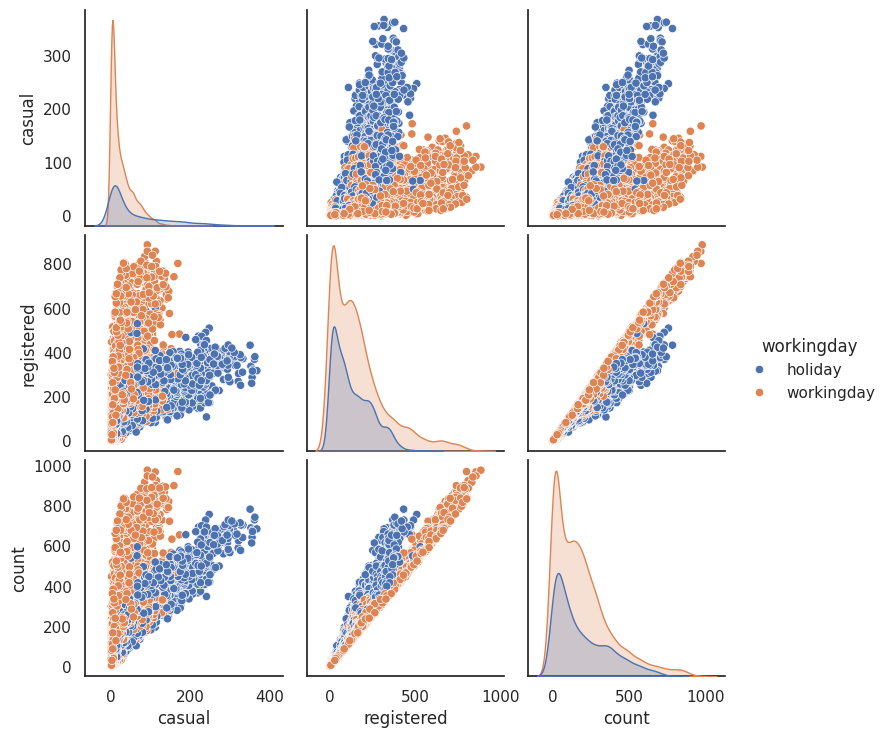

In [23]:
columns_to_plot = ['casual', 'registered', 'count', 'workingday']
df_filtered = df[columns_to_plot].copy()
holiday_mapping = { 1: 'workingday', 0: 'holiday'}
df_filtered['workingday'] = df_filtered['workingday'].map(holiday_mapping)
sns.pairplot(df_filtered, hue='workingday')

##Відповідь

1. Загальна кількість оренд велосипедів здається вищою в робочі дні, ніж у святкові. Це може бути пов’язано з регулярними поїздками користувачів на роботу в робочі дні.

2. Кількість незареєстрованих (Casual) користувачів значно більша у святкові дні

3. Зареєстровані користувачі активні і в робочі, і святкові дні, але кількість орендованих велосипедів більша у робочі дні. Це знову може бути пов’язано з регулярними поїздками користувачів на роботу в робочі дні.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [6]:
df['date'] = df.datetime.dt.date

<Figure size 1000x500 with 0 Axes>

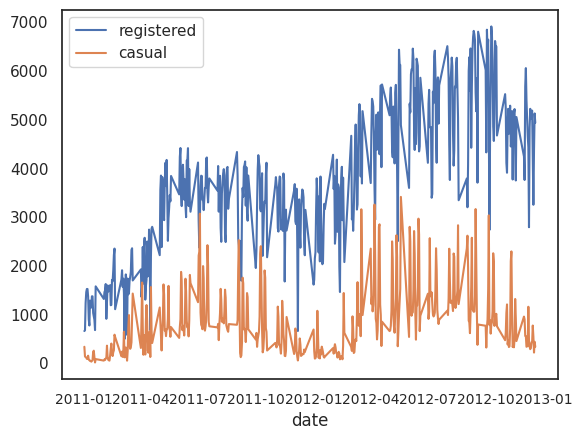

In [11]:
plt.figure(figsize=(10, 5))
df_viz = df[['date', 'registered', 'casual']].copy()
df_viz.groupby(df_viz['date']).sum().plot()
plt.gca().tick_params(axis='x', labelsize=10)

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
